<center>
<img src ='Pic\logo_CNTT.png' width='500px'>
<h1> PHÂN TÍCH  DỮ LIỆU ĐIỂM THI THPT QUỐC GIA NĂM 2022</h1>
</center>

---

<img src='https://media.vneconomy.vn/w800/images/upload/2022/03/10/c506aaf7-0904-4b16-9b49-9f9cab27e3a3.jpeg' width='500px'>

----------------------
**Tập dữ liệu:**
* Tập dữ liệu là thông tin về những thí sinh tham gia kỳ thi THPT Quốc Gia 2022.
* Tập dữ liệu bao gồm 10 cột:
    - Số báo danh: Bao gồm 8 chữ số và 2 số đầu của dãy thể hiện cụm thi
    - Toán, Ngữ văn, Ngoại ngữ, Sinh học, Vật lý, Hóa học, Địa lý, Lịch sử, GDCD: Tên các môn thi

-------------------------------
**Mục tiêu:**
1. Phân tích phổ điểm thi một số môn học.
2. Tìm hiểu những điều thú vị rút ra từ tập dữ liệu.

**Thành viên**
   * Nguyễn Ngọc Minh(2121050595)
   * Trịnh Công Sơn(2121050194)
   * Bùi Quý Cường(2121050156)

---
*Copyright: Đặng Văn Nam - FIT.HUMG  - AIAcademy @2021*

In [1]:
#Khai báo sử dụng các thư viện
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#--------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "./data_ok/all_data_ok.xlsx"

**Có index_col**

In [5]:
all_data = pd.read_excel(path, index_col=0)

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995441 entries, 0 to 995440
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Số báo danh  995441 non-null  int64  
 1   Toán         982726 non-null  float64
 2   Ngữ văn      981407 non-null  float64
 3   Ngoại ngữ    870609 non-null  float64
 4   Vật lý       325523 non-null  float64
 5   Hóa học      327367 non-null  float64
 6   Sinh học     322198 non-null  float64
 7   Lịch sử      659662 non-null  float64
 8   Địa lý       657421 non-null  float64
 9   GDCD         554343 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 83.5 MB


In [7]:
all_data.head()

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [8]:
all_data.tail()

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
995436,64006584,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
995437,64006585,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
995438,64006586,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
995439,64006587,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75
995440,64006588,6.6,4.50,3.2,NaN,NaN,NaN,3.00,6.00,7.50


In [9]:
all_data.fillna(-1, inplace=True)

In [10]:
all_data.tail()

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
995436,64006584,8.4,6.75,4.6,-1.0,-1.0,-1.0,6.50,6.75,9.00
995437,64006585,5.6,6.50,2.8,-1.0,-1.0,-1.0,6.25,6.75,8.50
995438,64006586,5.8,6.00,6.6,-1.0,-1.0,-1.0,7.25,8.00,8.00
995439,64006587,7.6,6.75,7.0,-1.0,-1.0,-1.0,8.75,7.25,9.75
995440,64006588,6.6,4.50,3.2,-1.0,-1.0,-1.0,3.00,6.00,7.50


In [11]:
all_data.shape[0]

995441

In [12]:
all_data["Toán"].isnull().sum()

0

In [13]:
all_data["Ngữ văn"].isnull().sum()

0

<center>
    <h2>
        Thí sinh hợp lệ là thí sinh thi đủ 6 môn <br>

        Thí sinh hợp lệ = KHXH + KHTN
    
</center>

In [14]:
thi_sinh_thi_KHXH = all_data[(all_data["Toán"] != -1) 
                            & (all_data["Ngữ văn"] != -1)
                            & (all_data["Ngoại ngữ"] != -1)
                            & (all_data["Lịch sử"] != -1)
                            & (all_data["Địa lý"] != -1)
                            & (all_data["GDCD"] != -1)]

In [15]:
thi_sinh_thi_KHXH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549574 entries, 0 to 995440
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Số báo danh  549574 non-null  int64  
 1   Toán         549574 non-null  float64
 2   Ngữ văn      549574 non-null  float64
 3   Ngoại ngữ    549574 non-null  float64
 4   Vật lý       549574 non-null  float64
 5   Hóa học      549574 non-null  float64
 6   Sinh học     549574 non-null  float64
 7   Lịch sử      549574 non-null  float64
 8   Địa lý       549574 non-null  float64
 9   GDCD         549574 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 46.1 MB


In [16]:
thi_sinh_thi_KHXH.count()

Số báo danh    549574
Toán           549574
Ngữ văn        549574
Ngoại ngữ      549574
Vật lý         549574
Hóa học        549574
Sinh học       549574
Lịch sử        549574
Địa lý         549574
GDCD           549574
dtype: int64

In [17]:
thi_sinh_thi_KHXH.shape

(549574, 10)

In [18]:
thi_sinh_thi_KHXH.shape[0]

549574

In [19]:
thi_sinh_thi_KHTN = all_data[(all_data["Toán"] != -1) 
                            & (all_data["Ngữ văn"] != -1)
                            & (all_data["Ngoại ngữ"] != -1)
                            & (all_data["Vật lý"] != -1)
                            & (all_data["Hóa học"] != -1)
                            & (all_data["Sinh học"] != -1)]

In [20]:
thi_sinh_thi_KHTN

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
10,1000011,6.4,7.25,7.6,3.50,8.00,3.00,-1.0,-1.0,-1.0
14,1000015,8.6,7.25,9.6,8.25,3.25,4.25,-1.0,-1.0,-1.0
15,1000016,7.8,5.75,8.4,4.25,8.00,4.75,-1.0,-1.0,-1.0
16,1000017,8.6,6.25,7.0,7.00,3.50,3.75,-1.0,-1.0,-1.0
22,1000023,6.8,6.00,6.8,2.50,5.50,3.00,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
995410,64006558,8.0,5.00,3.0,6.00,8.00,2.75,-1.0,-1.0,-1.0
995411,64006559,5.8,4.75,3.6,4.75,3.50,3.50,-1.0,-1.0,-1.0
995423,64006571,6.4,6.50,3.4,6.75,6.00,5.25,-1.0,-1.0,-1.0
995427,64006575,5.8,5.25,3.4,5.00,5.00,2.00,-1.0,-1.0,-1.0


In [21]:
thi_sinh_thi_KHTN.count()

Số báo danh    309162
Toán           309162
Ngữ văn        309162
Ngoại ngữ      309162
Vật lý         309162
Hóa học        309162
Sinh học       309162
Lịch sử        309162
Địa lý         309162
GDCD           309162
dtype: int64

In [22]:
thi_sinh_thi_KHTN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309162 entries, 10 to 995429
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Số báo danh  309162 non-null  int64  
 1   Toán         309162 non-null  float64
 2   Ngữ văn      309162 non-null  float64
 3   Ngoại ngữ    309162 non-null  float64
 4   Vật lý       309162 non-null  float64
 5   Hóa học      309162 non-null  float64
 6   Sinh học     309162 non-null  float64
 7   Lịch sử      309162 non-null  float64
 8   Địa lý       309162 non-null  float64
 9   GDCD         309162 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 25.9 MB


**Thí sinh hợp lệ**

In [23]:
thi_sinh_hop_le = pd.concat([thi_sinh_thi_KHTN,thi_sinh_thi_KHXH],ignore_index=True)

In [24]:
thi_sinh_hop_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858736 entries, 0 to 858735
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Số báo danh  858736 non-null  int64  
 1   Toán         858736 non-null  float64
 2   Ngữ văn      858736 non-null  float64
 3   Ngoại ngữ    858736 non-null  float64
 4   Vật lý       858736 non-null  float64
 5   Hóa học      858736 non-null  float64
 6   Sinh học     858736 non-null  float64
 7   Lịch sử      858736 non-null  float64
 8   Địa lý       858736 non-null  float64
 9   GDCD         858736 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 65.5 MB


In [25]:
thi_sinh_hop_le.shape[0] == thi_sinh_thi_KHTN.shape[0] + thi_sinh_thi_KHXH.shape[0]

True

In [26]:
# tạo dataframe chứa tất cả các thí sinh không hợp lệ
# ứng dụng xóa các hàng trùng lặp
# df.drop_duplicates(keep=False):
#thi_sinh_hop_le = pd.concat([thi_sinh_thi_KHTN,thi_sinh_thi_KHXH],ignore_index=True)
join_data = pd.concat([thi_sinh_hop_le, all_data], ignore_index=True)

In [27]:
# xóa các hàng trùng lặp sẽ có df thi_sinh_khong_hop_le
thi_sinh_khong_hop_le = join_data.drop_duplicates(keep=False)

In [28]:
thi_sinh_khong_hop_le.head()

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
858744,1000009,2.6,5.25,-1.0,-1.0,-1.0,-1.0,5.25,6.75,-1.0
858747,1000012,6.4,7.50,-1.0,-1.0,-1.0,-1.0,4.75,5.00,8.0
858749,1000014,5.8,5.50,6.4,-1.0,-1.0,-1.0,8.50,8.00,-1.0
858754,1000019,6.8,7.50,-1.0,-1.0,-1.0,-1.0,7.25,6.25,8.0
858755,1000020,-1.0,6.75,-1.0,-1.0,-1.0,-1.0,8.50,8.00,-1.0


In [29]:
# thi_sinh_khong_hop_le.shape[0] == so_thi_sinh_khong_hop_le

In [30]:
thi_sinh_khong_hop_le.reset_index(drop=True)

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
0,1000009,2.6,5.25,-1.0,-1.0,-1.0,-1.0,5.25,6.75,-1.0
1,1000012,6.4,7.50,-1.0,-1.0,-1.0,-1.0,4.75,5.00,8.0
2,1000014,5.8,5.50,6.4,-1.0,-1.0,-1.0,8.50,8.00,-1.0
3,1000019,6.8,7.50,-1.0,-1.0,-1.0,-1.0,7.25,6.25,8.0
4,1000020,-1.0,6.75,-1.0,-1.0,-1.0,-1.0,8.50,8.00,-1.0
...,...,...,...,...,...,...,...,...,...,...
136700,64006414,4.6,4.00,-1.0,-1.0,-1.0,-1.0,6.25,-1.00,-1.0
136701,64006424,8.2,6.50,-1.0,-1.0,-1.0,-1.0,7.75,-1.00,-1.0
136702,64006425,-1.0,3.25,-1.0,-1.0,-1.0,-1.0,5.25,6.75,-1.0
136703,64006430,-1.0,5.75,-1.0,-1.0,-1.0,-1.0,7.75,8.00,-1.0


In [31]:
type(thi_sinh_hop_le)

pandas.core.frame.DataFrame

In [32]:
so_thi_sinh_hop_le = thi_sinh_hop_le.shape[0]

In [33]:
so_thi_sinh_khong_hop_le = all_data.shape[0] - so_thi_sinh_hop_le

In [34]:
print(so_thi_sinh_khong_hop_le)
print(so_thi_sinh_hop_le)

136705
858736


**CÓ trường hợp thí sinh nào thi nhiều hơn 6 môn không**

In [35]:
test = all_data[(all_data["Toán"] != -1) 
                            & (all_data["Ngữ văn"] != -1)
                            & (all_data["Ngoại ngữ"] != -1)
                            & (all_data["Lịch sử"] != -1)
                            & (all_data["Địa lý"] != -1)
                            & (all_data["GDCD"] != -1)
                            & (all_data["Vật lý"] != -1)]

In [36]:
test

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD


**TÍnh số môn học sinh thi**

In [38]:
# xác định x là số giá trị -1 của các hàng
# lấy 9 trừ đi x
# từ 0 đến 9 môn
so_mon_thi_sinh_thi = [0,0,0,0,0,0,0,0,0,0]
for s in range(len(all_data)):
    #học sinh thứ s
#     print(all_data.iloc[s,:])
    #đếm số phần từ khác -1 sau đó +1 vào vị trí số phần tử khác -1
    tong_so_mon_thi = 0
    for i in range(1,10):
        if all_data.iloc[s,:][i] != -1:
            tong_so_mon_thi += 1
#     so_mon_thi_sinh_thi[tong_so_mon_thi] = so_mon_thi_sinh_thi[tong_so_mon_thi] + 1
    so_mon_thi_sinh_thi[tong_so_mon_thi] += 1
#     print(tong_so_mon_thi)
print(so_mon_thi_sinh_thi)
        

[6, 414, 636, 28198, 94695, 12756, 858736, 0, 0, 0]


In [39]:
sum(so_mon_thi_sinh_thi)

995441

In [40]:
thi_sinh_khong_thi_mon_nao_ca =  all_data[(all_data["Toán"] == -1) 
                                         & (all_data["Ngữ văn"] == -1) 
                                         & (all_data["Ngoại ngữ"] == -1) 
                                         & (all_data["Vật lý"] == -1) 
                                         & (all_data["Hóa học"] == -1) 
                                         & (all_data["Sinh học"] == -1)
                                         & (all_data["Lịch sử"] == -1)
                                         & (all_data["Địa lý"] == -1)
                                         & (all_data["GDCD"] == -1)]

In [41]:
thi_sinh_khong_thi_mon_nao_ca

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
289214,14006747,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
354593,18015504,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
640107,37001975,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
697288,40015744,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
894448,54004539,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
910349,55006110,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


<center>
<h1> Phân tích về phổ điểm tất cả các môn</h1>
    </center>

<center>
    <h2>
        Phổ điểm môn Toán
    </h2>
</center>

In [42]:
# Phổ điểm môn toán
diem_toan = all_data[["Toán"]]

In [43]:
diem_toan

,Toán
0,3.6
1,8.4
2,5.8
3,7.4
4,7.2
...,...
995436,8.4
995437,5.6
995438,5.8
995439,7.6


In [44]:
so_luong_cac_dau_diem_toan = diem_toan.value_counts().sort_index()

In [45]:
print(so_luong_cac_dau_diem_toan)

Toán 
-1.0     12715
 0.0         3
 0.2         1
 0.4         3
 0.6         6
 0.8        42
 1.0       109
 1.2       260
 1.4       568
 1.6      1129
 1.8      1980
 2.0      3123
 2.2      4373
 2.4      5965
 2.6      7207
 2.8      8533
 3.0      9661
 3.2     10724
 3.4     11981
 3.6     13066
 3.8     14265
 4.0     15359
 4.2     16898
 4.4     18528
 4.6     20204
 4.8     22232
 5.0     23712
 5.2     25704
 5.4     27651
 5.6     29634
 5.8     31292
 6.0     33409
 6.2     35357
 6.4     37964
 6.6     40132
 6.8     42732
 7.0     45808
 7.2     48716
 7.4     51490
 7.6     53693
 7.8     54495
 8.0     52273
 8.2     48222
 8.4     40654
 8.6     31021
 8.8     20796
 9.0     12095
 9.2      5915
 9.4      2540
 9.6       926
 9.8       240
 10.0       35
dtype: int64


In [46]:
so_luong_cac_dau_diem_toan.shape[0]

52

In [47]:
index_so_luong_cac_dau_diem_toan = so_luong_cac_dau_diem_toan.index

In [48]:
index_so_luong_cac_dau_diem_toan.dtypes

Toán    float64
dtype: object

In [49]:
value_so_luong_cac_dau_diem_toan = so_luong_cac_dau_diem_toan.values

In [50]:
print(type(value_so_luong_cac_dau_diem_toan))
print(len(value_so_luong_cac_dau_diem_toan))
value_so_luong_cac_dau_diem_toan

<class 'numpy.ndarray'>
52


array([12715,     3,     1,     3,     6,    42,   109,   260,   568,
        1129,  1980,  3123,  4373,  5965,  7207,  8533,  9661, 10724,
       11981, 13066, 14265, 15359, 16898, 18528, 20204, 22232, 23712,
       25704, 27651, 29634, 31292, 33409, 35357, 37964, 40132, 42732,
       45808, 48716, 51490, 53693, 54495, 52273, 48222, 40654, 31021,
       20796, 12095,  5915,  2540,   926,   240,    35], dtype=int64)

In [51]:
# type(index_so_luong_cac_dau_diem_toan)
print(len(index_so_luong_cac_dau_diem_toan))
# print(index_so_luong_cac_dau_diem_toan)
# print(index_so_luong_cac_dau_diem_toan[2])
# index_so_luong_cac_dau_diem_toan[2]
# print(index_so_luong_cac_dau_diem_toan)
list_dau_diem = [-1]
for i in range(0,51):
    list_dau_diem.append(round(i*0.2,2))
print(list_dau_diem)

52
[-1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0]


In [52]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',rotation="vertical", size = "10",weight="demi")

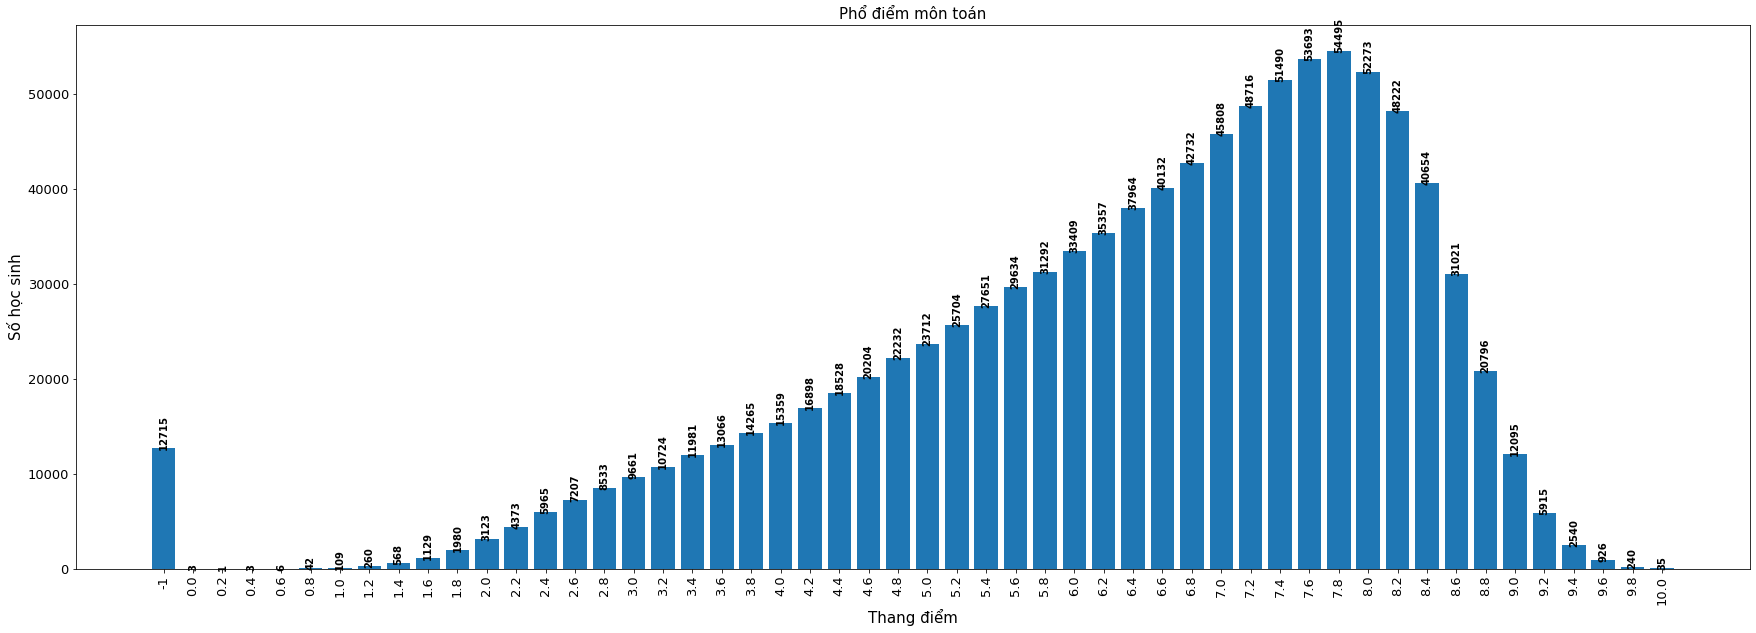

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10))
y_pos = np.arange(len(list_dau_diem))

plt.bar(y_pos, value_so_luong_cac_dau_diem_toan)
plt.xticks(y_pos, list_dau_diem,fontsize=13, rotation=90)
plt.yticks(fontsize=13)

plt.xlabel('Thang điểm', fontsize=15)
plt.ylabel('Số học sinh' ,fontsize=15)
plt.title('Phổ điểm môn toán', fontsize=15)

addlabels(list_dau_diem,value_so_luong_cac_dau_diem_toan)
plt.savefig('Save_charts/Pho_diem_mon_toan.pdf',dpi=1500,format='pdf') #lưu file PDF
plt.show()



<center>
    <h2>
        Phổ điểm môn Ngoại ngữ
    </h2>
</center>

In [54]:
# Phổ điểm môn Ngữ văn
diem_mon_ngoai_ngu = all_data[["Ngoại ngữ"]]

In [55]:
so_luong_cac_dau_diem_ngoai_ngu = diem_mon_ngoai_ngu.value_counts().sort_index()
print(so_luong_cac_dau_diem_ngoai_ngu)
print(so_luong_cac_dau_diem_ngoai_ngu.shape[0])

Ngoại ngữ
-1.0         124832
 0.0              8
 0.4              4
 0.6             23
 0.8            112
 1.0            271
 1.2            679
 1.4           1374
 1.6           2928
 1.8           5114
 2.0           8278
 2.2          12263
 2.4          16824
 2.6          21618
 2.8          26131
 3.0          30244
 3.2          33381
 3.4          35688
 3.6          36953
 3.8          38129
 4.0          37943
 4.2          36657
 4.4          36018
 4.6          34109
 4.8          32649
 5.0          30770
 5.2          29151
 5.4          27345
 5.6          25539
 5.8          23957
 6.0          22510
 6.2          21299
 6.4          19849
 6.6          19089
 6.8          18156
 7.0          17216
 7.2          16405
 7.4          15917
 7.6          15477
 7.8          15274
 8.0          14852
 8.2          14677
 8.4          14363
 8.6          13848
 8.8          12832
 9.0          11310
 9.2           9288
 9.4           6987
 9.6           4395
 9.8      

In [56]:
value_so_luong_cac_dau_diem_ngoai_ngu = so_luong_cac_dau_diem_ngoai_ngu.values

In [57]:
#list các đầu điểm ngoại ngữ
list_cac_dau_diem_ngoai_ngu = [-1, 0]
for i in range(2,51):
    list_cac_dau_diem_ngoai_ngu.append(round(i*0.2, 2))
print(list_cac_dau_diem_ngoai_ngu)

[-1, 0, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0]


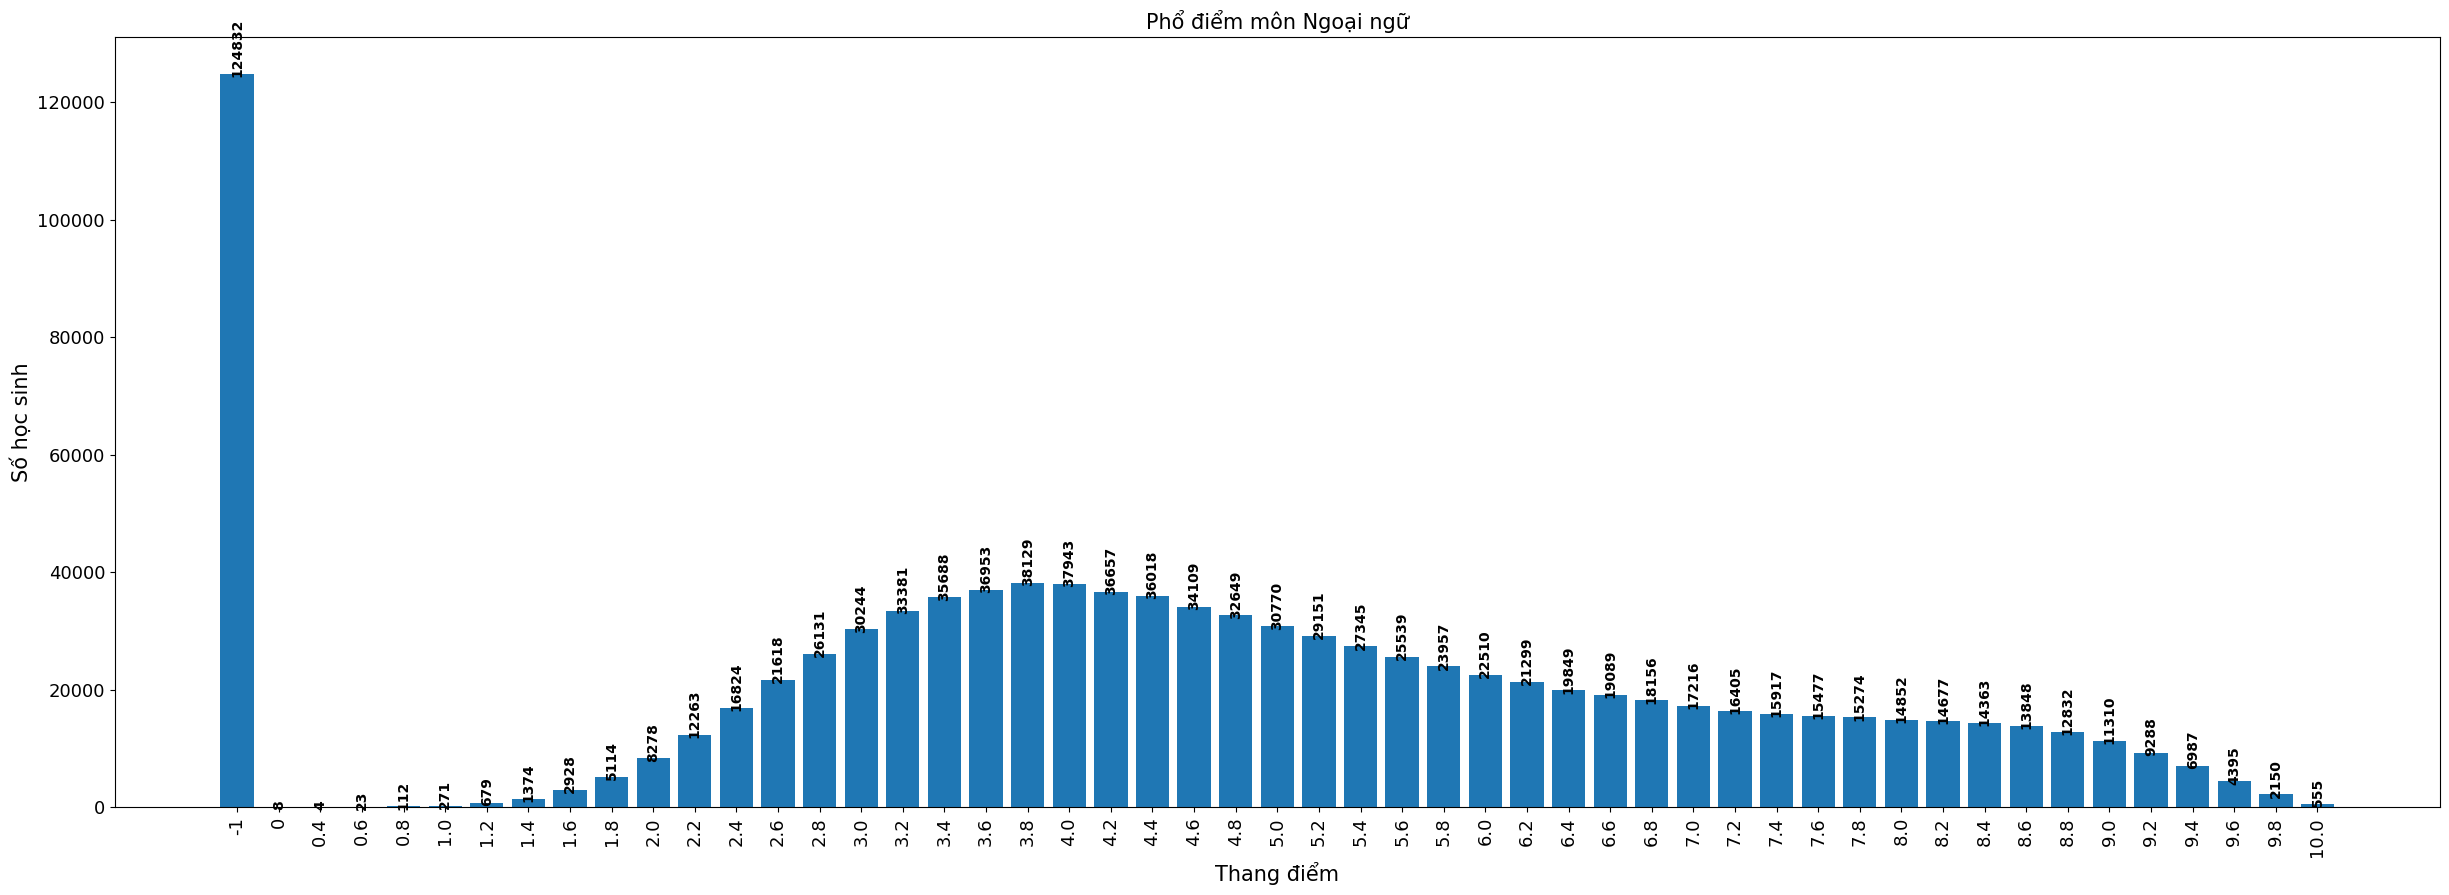

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10))
y_pos = np.arange(len(list_cac_dau_diem_ngoai_ngu))

plt.bar(y_pos, value_so_luong_cac_dau_diem_ngoai_ngu)
plt.xticks(y_pos, list_cac_dau_diem_ngoai_ngu,fontsize=13, rotation=90)
plt.yticks(fontsize=13)


plt.xlabel('Thang điểm', fontsize=15)
plt.ylabel('Số học sinh' ,fontsize=15)
plt.title('Phổ điểm môn Ngoại ngữ', fontsize=15)

addlabels(list_cac_dau_diem_ngoai_ngu,value_so_luong_cac_dau_diem_ngoai_ngu)
plt.savefig('Save_charts/Pho_diem_mon_ngoai_ngu.pdf',dpi=1500,format='pdf') #lưu file PDF
plt.show()



<center>
    <h1>
        Phân tích về tỉ lệ bỏ thi
    </h1>
</center>

<center>
<h3>
    Thứ tự môn thi là Văn - Toán - Tổ hợp - Ngoại ngữ <br>
    Thời gian thi lần lượt là sáng - chiều - sáng - chiều <br>
    Có hay không việc số lượng thí sinh bỏ phụ thuộc vào điểm những bài thi đầu tiên
</h3>
</center>

In [59]:
so_luong_thi_sinh_bo_thi_mon_ngu_van = all_data[(all_data["Ngữ văn"] == -1)]

In [60]:
so_luong_thi_sinh_bo_thi_mon_ngu_van.shape[0]

14034

In [61]:
so_luong_thi_sinh_bo_thi_mon_toan = all_data[(all_data["Toán"] == -1)]

In [62]:
so_luong_thi_sinh_bo_thi_mon_toan.shape[0]

12715

In [63]:
so_luong_thi_sinh_bo_thi_mon_ngoai_ngu = all_data[(all_data["Ngoại ngữ"] == -1)]

In [64]:
so_luong_thi_sinh_bo_thi_mon_ngoai_ngu.shape[0]

124832

In [65]:
so_luong_thi_sinh_chon_thi_khtn = all_data[(all_data["Vật lý"] != -1) 
                            | (all_data["Sinh học"] != -1)
                            | (all_data["Hóa học"] != -1)]

In [66]:
so_luong_thi_sinh_chon_thi_khtn.shape[0]

329235

In [67]:
so_luong_thi_sinh_chon_thi_khtn

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
10,1000011,6.4,7.25,7.6,3.50,8.00,3.00,-1.0,-1.0,-1.0
14,1000015,8.6,7.25,9.6,8.25,3.25,4.25,-1.0,-1.0,-1.0
15,1000016,7.8,5.75,8.4,4.25,8.00,4.75,-1.0,-1.0,-1.0
16,1000017,8.6,6.25,7.0,7.00,3.50,3.75,-1.0,-1.0,-1.0
22,1000023,6.8,6.00,6.8,2.50,5.50,3.00,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
995410,64006558,8.0,5.00,3.0,6.00,8.00,2.75,-1.0,-1.0,-1.0
995411,64006559,5.8,4.75,3.6,4.75,3.50,3.50,-1.0,-1.0,-1.0
995423,64006571,6.4,6.50,3.4,6.75,6.00,5.25,-1.0,-1.0,-1.0
995427,64006575,5.8,5.25,3.4,5.00,5.00,2.00,-1.0,-1.0,-1.0


In [68]:
so_luong_thi_sinh_bo_thi_khtn = so_luong_thi_sinh_chon_thi_khtn[(so_luong_thi_sinh_chon_thi_khtn["Vật lý"] == -1)
                                                               | (so_luong_thi_sinh_chon_thi_khtn["Hóa học"] == -1)
                                                               | (so_luong_thi_sinh_chon_thi_khtn["Sinh học"] == -1)]

In [69]:
so_luong_thi_sinh_bo_thi_khtn.shape[0]

10550

In [70]:
so_luong_thi_sinh_chon_thi_khxh = all_data[(all_data["GDCD"] != -1) 
                            | (all_data["Địa lý"] != -1)
                            | (all_data["Lịch sử"] != -1)]

In [71]:
so_luong_thi_sinh_chon_thi_khxh.shape[0]

660078

In [72]:
so_luong_thi_sinh_bo_thi_khxh = so_luong_thi_sinh_chon_thi_khxh[(so_luong_thi_sinh_chon_thi_khxh["GDCD"] == -1)
                                                               | (so_luong_thi_sinh_chon_thi_khxh["Lịch sử"] == -1)
                                                               | (so_luong_thi_sinh_chon_thi_khxh["Địa lý"] == -1)]

In [73]:
so_luong_thi_sinh_bo_thi_khxh.shape[0]

105988

In [74]:
nhung_thi_sinh_khong_xac_dinh_duoc_to_hop = all_data.shape[0] - so_luong_thi_sinh_chon_thi_khtn.shape[0] - so_luong_thi_sinh_chon_thi_khxh.shape[0]

In [75]:
nhung_thi_sinh_khong_xac_dinh_duoc_to_hop

6128

In [76]:
tong_so_hoc_sinh_bo_thi_mon_to_hop = so_luong_thi_sinh_bo_thi_khxh.shape[0] + so_luong_thi_sinh_bo_thi_khtn.shape[0]
print(tong_so_hoc_sinh_bo_thi_mon_to_hop)

116538


In [77]:
tong_so_hoc_sinh_co_to_hop_xac_dinh = all_data.shape[0] - nhung_thi_sinh_khong_xac_dinh_duoc_to_hop
print(tong_so_hoc_sinh_co_to_hop_xac_dinh)

989313


In [78]:
#danh sách số học sinh bỏ thi theo thứ tự Văn-Toán-Tổ hợp-Ngoại ngữ
danh_sach_so_hoc_sinh_bo_thi = [so_luong_thi_sinh_bo_thi_mon_ngu_van.shape[0],
                               so_luong_thi_sinh_bo_thi_mon_toan.shape[0],
                               tong_so_hoc_sinh_bo_thi_mon_to_hop,
                               so_luong_thi_sinh_bo_thi_mon_ngoai_ngu.shape[0]]
print(danh_sach_so_hoc_sinh_bo_thi)

[14034, 12715, 116538, 124832]


In [79]:
# danh sách tỉ lệ số học sinh bỏ thi theo thứ tự Văn-Toán-Tổ hợp-Ngoại ngữ
danh_sach_ti_le_hoc_sinh_bo_thi = [round(100*so_luong_thi_sinh_bo_thi_mon_ngu_van.shape[0]/all_data.shape[0],2)
,round(100*so_luong_thi_sinh_bo_thi_mon_toan.shape[0]/all_data.shape[0],2)
,round(tong_so_hoc_sinh_bo_thi_mon_to_hop*100/tong_so_hoc_sinh_co_to_hop_xac_dinh,2)
,round(100*so_luong_thi_sinh_bo_thi_mon_ngoai_ngu.shape[0]/all_data.shape[0],2)

]
print(danh_sach_ti_le_hoc_sinh_bo_thi)


[1.41, 1.28, 11.78, 12.54]


In [80]:
# danh sách các môn thi
danh_sach_cac_mon_thi = ["Ngữ văn", "Toán", "Tổ hợp", "Ngoại ngữ"]

<center>
<h3>
    Vẽ biểu đồ
</h3>
    </center>


In [81]:
# function to add value labels
def addlabels_1(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', size = "20",weight="demi")

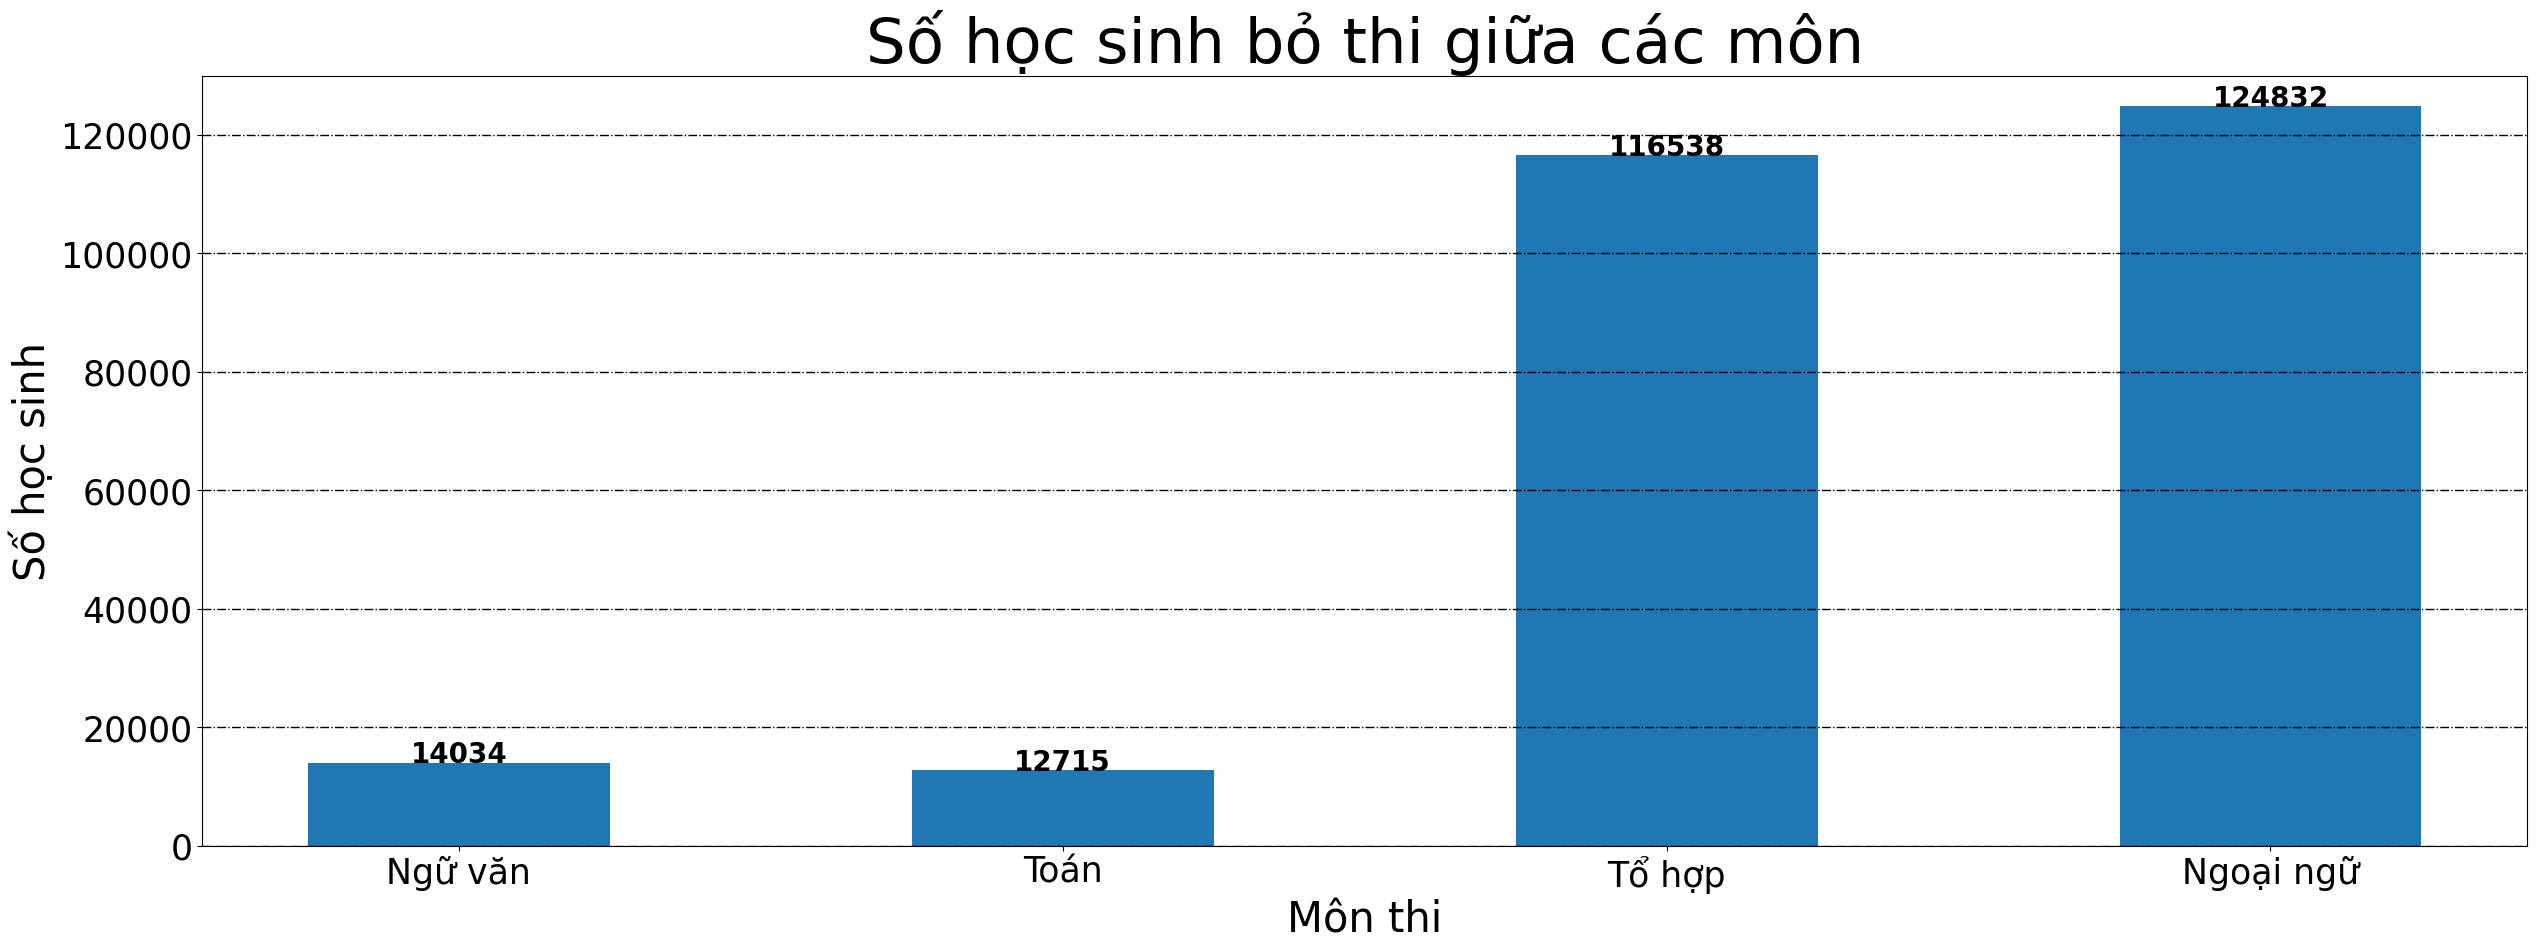

In [82]:
plt.figure(figsize = (30,10))
y_pos = np.arange(4)

plt.bar(y_pos, danh_sach_so_hoc_sinh_bo_thi, width=0.5)
plt.xticks(y_pos, danh_sach_cac_mon_thi,fontsize=25)
plt.yticks(fontsize=25)
#Setup giới hạn cho trục Y:
plt.ylim(0,130000)

plt.xlabel('Môn thi', fontsize=30)
plt.ylabel('Số học sinh' ,fontsize=30)
plt.title('Số học sinh bỏ thi giữa các môn', fontsize=45)

addlabels_1(danh_sach_cac_mon_thi,danh_sach_so_hoc_sinh_bo_thi)

plt.grid(axis='y',
         c='black',
         ls='-.',
         lw=1.0)
plt.show()



In [83]:
# tỉ lệ bỏ thi giữa các môn

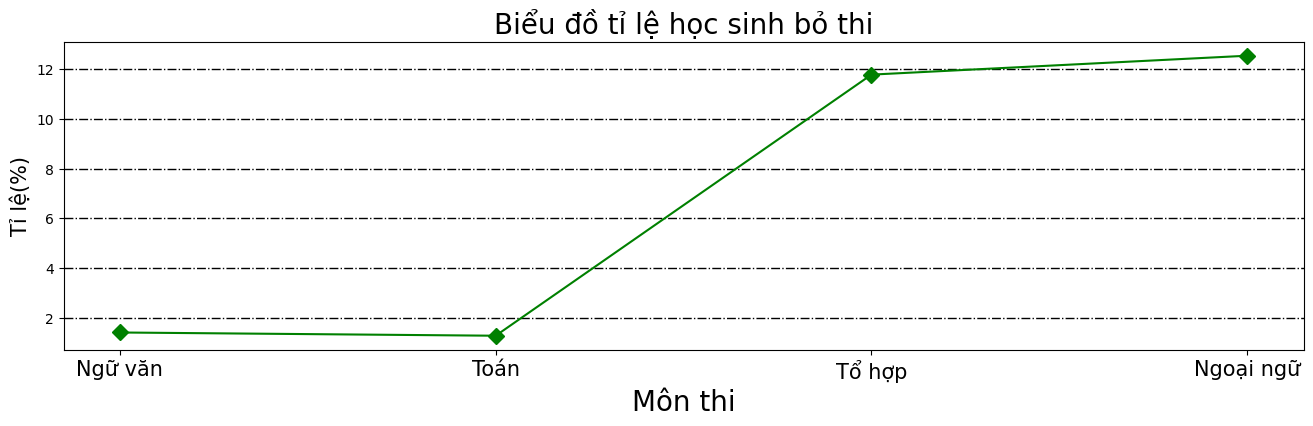

In [84]:
x = danh_sach_cac_mon_thi
y = danh_sach_ti_le_hoc_sinh_bo_thi

plt.figure(figsize = (16,4)) #Thiết lập kích thước biểu đồ

plt.plot(x,                 #Dữ liệu trục X
         y,                 #Dữ liệu trục Y
         color='g',         #Màu của đường
         linestyle='-',    #Kiểu đường
         linewidth=1.5,     #Độ rộng của đường line
         marker='D',        #Kiểu điểm
         markersize = 8)   #Kích thước điểm

#Tiêu đề của đồ thị
plt.title('Biểu đồ tỉ lệ học sinh bỏ thi' ,fontsize=20)
#Nhãn cho trục X
# plt.xlabel('Thời gian')
#Nhãn cho trục Y
plt.ylabel('Tỉ lệ(%)', fontsize=15)
plt.xlabel("Môn thi", fontsize=20)
#Setup giới hạn cho trục X:
# plt.xlim(1989,2009)

#Setup giới hạn cho trục Y:
# plt.ylim(2.5,6)

#Setup tick cho trục X:
plt.xticks(x, fontsize=15)

#Thiết lập lưới:
plt.grid(axis='y',
         c='black',
         ls='-.',
         lw=1.0)

plt.show()



<h4>
    Có hay không việc thí sinh bỏ thi toán văn nhưng vẫn thi đủ 3 môn tự chọn
</h4>

In [85]:
test_1 = all_data[(all_data["Toán"] == -1) 
                            & (all_data["Ngữ văn"] == -1)
                            & (all_data["Hóa học"] != -1)
                            & (all_data["Vật lý"] != -1)
                            & (all_data["Sinh học"] != -1)]

In [86]:
test_1

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
13918,1014061,-1.0,-1.0,-1.0,2.25,3.25,3.50,-1.0,-1.0,-1.0
69467,1069895,-1.0,-1.0,5.4,5.50,5.00,5.50,-1.0,-1.0,-1.0
70025,1070458,-1.0,-1.0,3.2,6.00,7.25,4.75,-1.0,-1.0,-1.0
77688,1078156,-1.0,-1.0,-1.0,7.00,6.25,3.25,-1.0,-1.0,-1.0
267012,12007669,-1.0,-1.0,2.4,1.50,2.75,4.00,-1.0,-1.0,-1.0
267295,12007958,-1.0,-1.0,-1.0,4.75,5.75,3.25,-1.0,-1.0,-1.0
330638,17007174,-1.0,-1.0,-1.0,6.00,5.25,3.25,-1.0,-1.0,-1.0
514921,28036158,-1.0,-1.0,-1.0,0.00,0.00,0.00,-1.0,-1.0,-1.0
542799,29026462,-1.0,-1.0,3.4,4.75,4.75,3.75,-1.0,-1.0,-1.0
559522,30006510,-1.0,-1.0,5.6,8.25,9.25,4.75,-1.0,-1.0,-1.0


<center>
    <h1>
        Phân tích về tỉ lệ số lượng môn học sinh thi
    </h1>
</center>

Thí sinh chon thi tổ hợp nào

Tổ hợp nào có tỉ lệ thí sinh bỏ thi nhiều nhất



In [87]:
thi_sinh_hop_le

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
0,1000011,6.4,7.25,7.6,3.50,8.00,3.00,-1.00,-1.00,-1.00
1,1000015,8.6,7.25,9.6,8.25,3.25,4.25,-1.00,-1.00,-1.00
2,1000016,7.8,5.75,8.4,4.25,8.00,4.75,-1.00,-1.00,-1.00
3,1000017,8.6,6.25,7.0,7.00,3.50,3.75,-1.00,-1.00,-1.00
4,1000023,6.8,6.00,6.8,2.50,5.50,3.00,-1.00,-1.00,-1.00
...,...,...,...,...,...,...,...,...,...,...
858731,64006584,8.4,6.75,4.6,-1.00,-1.00,-1.00,6.50,6.75,9.00
858732,64006585,5.6,6.50,2.8,-1.00,-1.00,-1.00,6.25,6.75,8.50
858733,64006586,5.8,6.00,6.6,-1.00,-1.00,-1.00,7.25,8.00,8.00
858734,64006587,7.6,6.75,7.0,-1.00,-1.00,-1.00,8.75,7.25,9.75


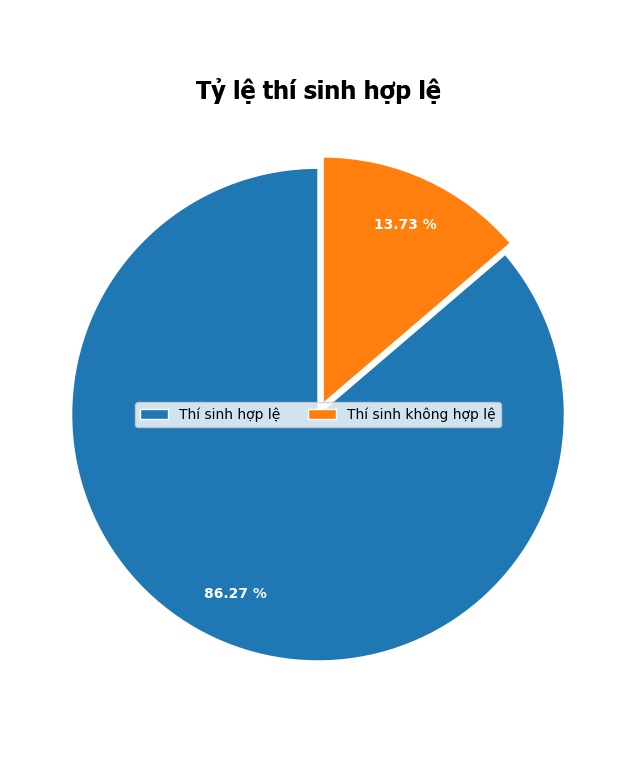

In [88]:
#THí sinh hợp lệ
thi_sinh_hop_le
thi_sinh_khong_hop_le

plt.figure(figsize = (12,8))
#Làm nổi bật một phần:
e = [0,0.05]
plt.pie([thi_sinh_hop_le.shape[0],thi_sinh_khong_hop_le.shape[0]], 
        labels=["Thí sinh hợp lệ", "Thí sinh không hợp lệ"],
        autopct='%.2f %%', 
        pctdistance=0.8,
        startangle=90,
        labeldistance=1.05,
        textprops={'color':'w','fontweight':'bold'},
        rotatelabels=True,
        wedgeprops=dict(edgecolor='w'),#Đường viền màu trắng
        explode=e)#Làm nổi bật một phần

plt.title('Tỷ lệ thí sinh hợp lệ', fontdict={'fontname':'Tahoma',
                                                    'fontweight':'bold',
                                                   'fontsize':18})
plt.legend(ncol=2, loc='center')
plt.show()


In [89]:
a  = [thi_sinh_hop_le.shape[0],thi_sinh_khong_hop_le.shape[0]]
print(a)
labels=["Thí sinh hợp lệ", "Thí sinh không hợp lệ"]

[858736, 136705]


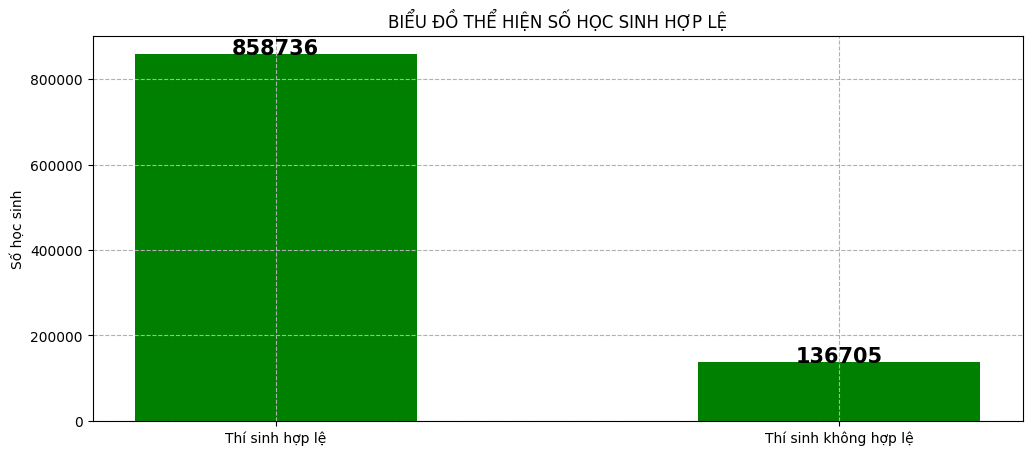

In [90]:
# function to add value labels
def addlabels_2(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', size = "15",weight="demi")



plt.figure(figsize = (12,5)) #Thiết lập kích thước biểu đồ

#Vẽ biểu đồ cột:
plt.bar(labels,         #Nhãn của trục X
        a,        #Giá trị tương ứng với nhãn
        color='green', #Màu của thanh
     #Giá trị bắt đầu của trục Y
        width = 0.5)   #Chiều rộng của thanh


addlabels_2(labels,a)
#Tiêu đề của đồ thị
plt.title('BIỂU ĐỒ THỂ HIỆN SỐ HỌC SINH HỢP LỆ')
plt.ylabel('Số học sinh')
plt.grid(ls='--')

plt.show()

In [91]:
# Thí sinh thi KHTN or KHXH or Không rõ 

In [93]:
print(so_luong_thi_sinh_chon_thi_khtn.shape[0])

print(so_luong_thi_sinh_chon_thi_khxh.shape[0])

print(nhung_thi_sinh_khong_xac_dinh_duoc_to_hop)

329235
660078
6128


In [94]:
danh_sach_to_hop = [so_luong_thi_sinh_chon_thi_khtn.shape[0],so_luong_thi_sinh_chon_thi_khxh.shape[0],nhung_thi_sinh_khong_xac_dinh_duoc_to_hop]
danh_sach_ten_to_hop = ["Khoa học tự nhiên","Khoa học xã hội","Không xác định"]

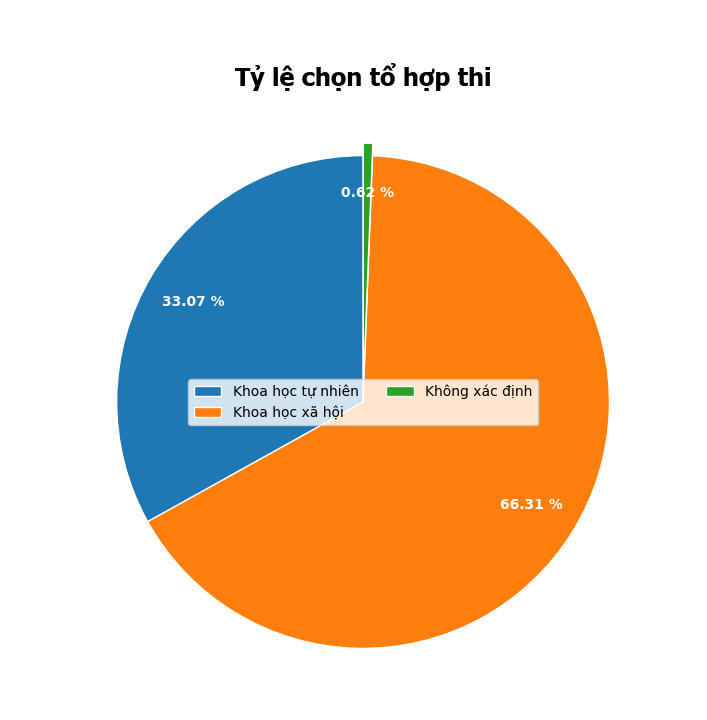

In [95]:
plt.figure(figsize = (12,8))
#Làm nổi bật một phần:
e = [0,0,0.05]
plt.pie(danh_sach_to_hop, 
        labels=danh_sach_ten_to_hop,
        autopct='%.2f %%', 
        pctdistance=0.8,
        startangle=90,
        labeldistance=1.05,
        textprops={'color':'w','fontweight':'bold'},
        rotatelabels=True,
        wedgeprops=dict(edgecolor='w'),#Đường viền màu trắng
        explode=e)#Làm nổi bật một phần

plt.title('Tỷ lệ chọn tổ hợp thi', fontdict={'fontname':'Tahoma',
                                                    'fontweight':'bold',
                                                   'fontsize':18})
plt.legend(ncol=2, loc='center')
plt.show()

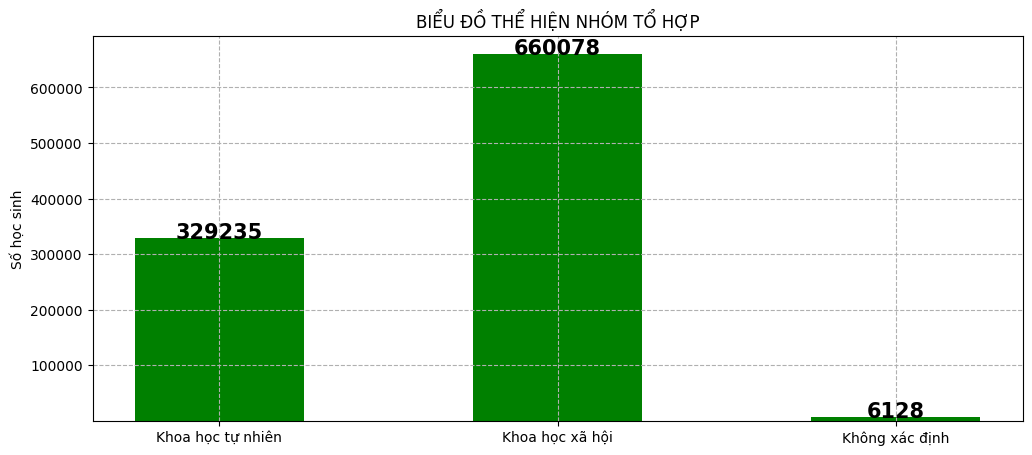

In [96]:
def addlabels_3(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', size = "15",weight="demi")





plt.figure(figsize = (12,5)) #Thiết lập kích thước biểu đồ

#Vẽ biểu đồ cột:
plt.bar(danh_sach_ten_to_hop,         #Nhãn của trục X
        danh_sach_to_hop,        #Giá trị tương ứng với nhãn
        color='green', #Màu của thanh
        bottom=3,      #Giá trị bắt đầu của trục Y
        width = 0.5)   #Chiều rộng của thanh

#Tiêu đề của đồ thị
plt.title('BIỂU ĐỒ THỂ HIỆN NHÓM TỔ HỢP')
plt.ylabel('Số học sinh')
plt.grid(ls='--')


addlabels_3(danh_sach_ten_to_hop,danh_sach_to_hop)
plt.show()

In [182]:
print(so_luong_thi_sinh_bo_thi_khtn.shape[0])
print(so_luong_thi_sinh_bo_thi_khxh.shape[0])
print(so_luong_thi_sinh_chon_thi_khtn.shape[0])
print(so_luong_thi_sinh_chon_thi_khxh.shape[0])
so_mon_thi_sinh_thi
list_thi = ["Thí sinh thi", "Thí sinh bỏ thi"]
khtn = [so_luong_thi_sinh_chon_thi_khtn.shape[0], so_luong_thi_sinh_bo_thi_khtn.shape[0] ]
khxh = [so_luong_thi_sinh_chon_thi_khxh.shape[0], so_luong_thi_sinh_bo_thi_khxh.shape[0]]

10550
105988
329235
660078


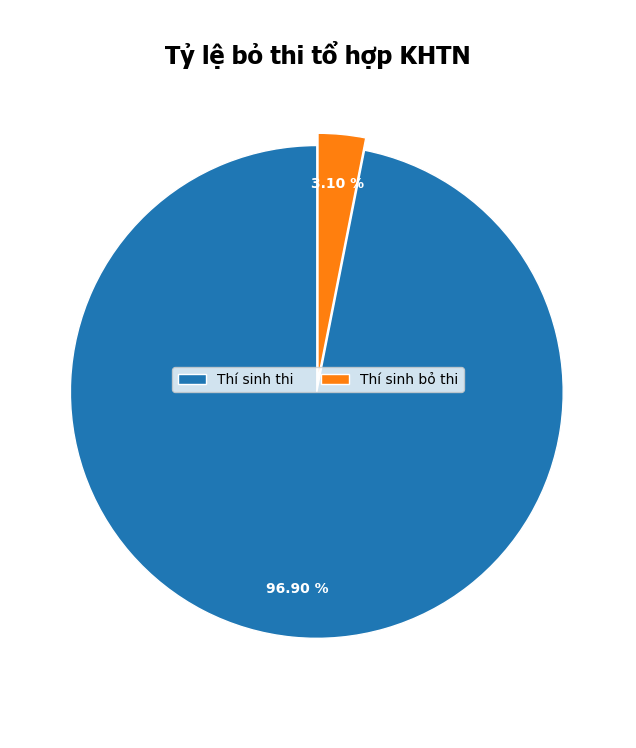

In [183]:
plt.figure(figsize = (12,8))
#Làm nổi bật một phần:
e = [0.05,0]
plt.pie(khtn, 
        labels=list_thi,
        autopct='%.2f %%', 
        pctdistance=0.8,
        startangle=90,
        labeldistance=1.05,
        textprops={'color':'w','fontweight':'bold'},
        rotatelabels=True,
        wedgeprops=dict(edgecolor='w'),#Đường viền màu trắng
        explode=e)#Làm nổi bật một phần

plt.title('Tỷ lệ bỏ thi tổ hợp KHTN', fontdict={'fontname':'Tahoma',
                                                    'fontweight':'bold',
                                                   'fontsize':18})
plt.legend(ncol=2, loc='center')
plt.show()

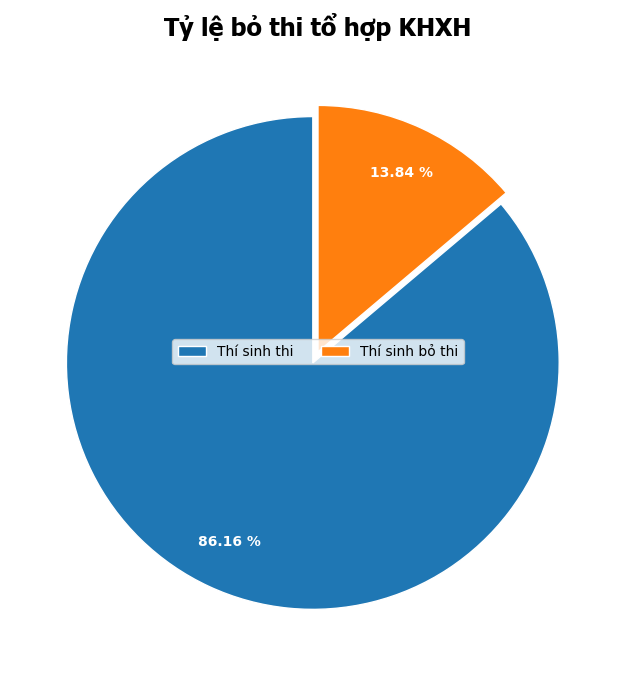

In [179]:
plt.figure(figsize = (12,8))
#Làm nổi bật một phần:
e = [0.05,0]
plt.pie(khxh, 
        labels=list_thi,
        autopct='%.2f %%', 
        pctdistance=0.8,
        startangle=90,
        labeldistance=1.05,
        textprops={'color':'w','fontweight':'bold'},
        rotatelabels=True,
        wedgeprops=dict(edgecolor='w'),#Đường viền màu trắng
        explode=e)#Làm nổi bật một phần

plt.title('Tỷ lệ bỏ thi tổ hợp KHXH', fontdict={'fontname':'Tahoma',
                                                    'fontweight':'bold',
                                                   'fontsize':18})
plt.legend(ncol=2, loc='center')
plt.show()

<center>
    <h1>
        Số môn thi 
    </h1>
</center>

In [97]:
so_mon_thi_sinh_thi

[6, 414, 636, 28198, 94695, 12756, 858736, 0, 0, 0]

In [98]:
list_so_luong = ["0 môn","1 môn","2 môn","3 môn","4 môn","5 môn","6 môn","7 môn","8 môn","9 môn"]

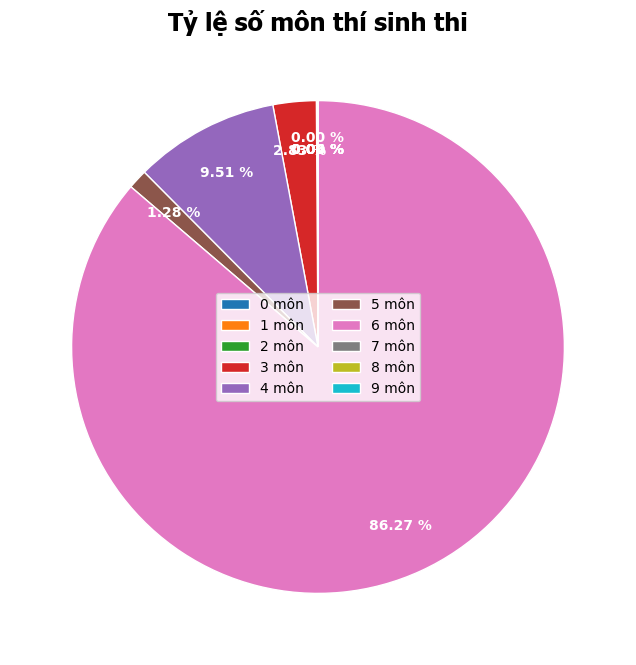

In [99]:
plt.figure(figsize = (12,8))
#Làm nổi bật một phần:
e = [0,0,0,0,0,0,0,0.05,0,0]
plt.pie(so_mon_thi_sinh_thi, 
        labels=list_so_luong,
        autopct='%.2f %%', 
        pctdistance=0.8,
        startangle=90,
        labeldistance=1.05,
        textprops={'color':'w','fontweight':'bold'},
        rotatelabels=True,
        wedgeprops=dict(edgecolor='w'),#Đường viền màu trắng
        explode=e)#Làm nổi bật một phần

plt.title('Tỷ lệ số môn thí sinh thi', fontdict={'fontname':'Tahoma',
                                                    'fontweight':'bold',
                                                   'fontsize':18})
plt.legend(ncol=2, loc='center')
plt.show()

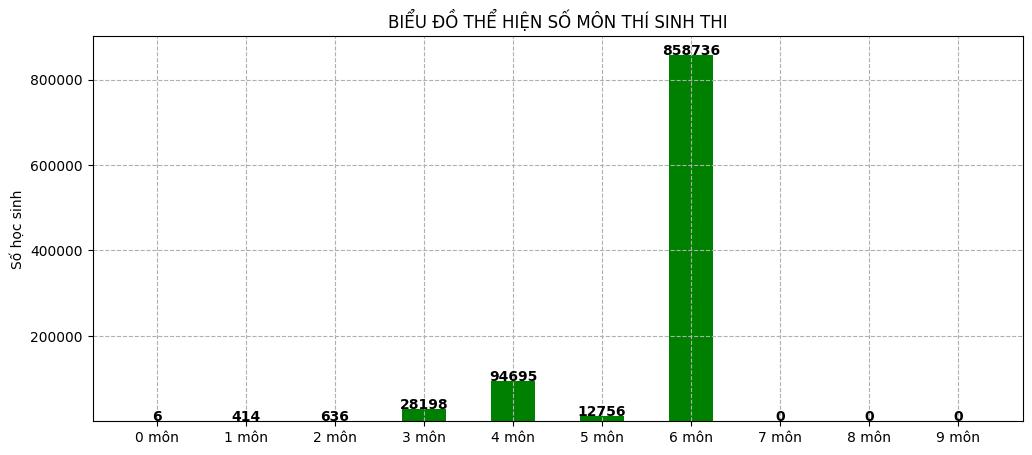

In [100]:
def addlabels_4(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', size = "10",weight="demi")

plt.figure(figsize = (12,5)) #Thiết lập kích thước biểu đồ

#Vẽ biểu đồ cột:
plt.bar(list_so_luong,         #Nhãn của trục X
        so_mon_thi_sinh_thi,        #Giá trị tương ứng với nhãn
        color='green', #Màu của thanh
        bottom=3,      #Giá trị bắt đầu của trục Y
        width = 0.5)   #Chiều rộng của thanh

#Tiêu đề của đồ thị
plt.title('BIỂU ĐỒ THỂ HIỆN SỐ MÔN THÍ SINH THI')
plt.ylabel('Số học sinh')
plt.grid(ls='--')


addlabels_4(list_so_luong,so_mon_thi_sinh_thi)
plt.show()

**LÚ CỰC**

In [193]:
diem_10_ngoai_ngu = all_data[all_data["Ngoại ngữ"]==10] 
so_thi_sinh_bo_thi_ngoai_ngu = all_data[all_data["Ngoại ngữ"]==-1]
print(diem_10_ngoai_ngu.shape[0])
print(so_thi_sinh_bo_thi_ngoai_ngu.shape[0])

555
124832


In [194]:
diem_10_toan = all_data[all_data["Toán"]==10]
so_thi_sinh_bo_thi_toan = all_data[all_data["Toán"]==-1]
print(diem_10_toan.shape[0])
print(so_thi_sinh_bo_thi_toan.shape[0])

35
12715


<center>
    <h1>
        Tìm thủ khoa khối A00
    </h1>
</center>

In [101]:
#Chỉ lấy điểm Khối A00
df_A00 = all_data[['Số báo danh','Toán','Vật lý','Hóa học']]
#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng | how = any (all) chỉ cần hàng có feature chứa missing
data_A00 = df_A00.dropna(axis=0,how='any')
data_A00.reset_index(drop=True, inplace=True)
data_A00

,Số báo danh,Toán,Vật lý,Hóa học
0,1000001,3.6,-1.0,-1.0
1,1000002,8.4,-1.0,-1.0
2,1000003,5.8,-1.0,-1.0
3,1000004,7.4,-1.0,-1.0
4,1000005,7.2,-1.0,-1.0
...,...,...,...,...
995436,64006584,8.4,-1.0,-1.0
995437,64006585,5.6,-1.0,-1.0
995438,64006586,5.8,-1.0,-1.0
995439,64006587,7.6,-1.0,-1.0


In [102]:
def point(point1,point2,point3):
    return round(point1+point2+point3,2)

In [103]:
data_A00['Total_score'] = data_A00.apply(lambda row: point(row['Toán'],
                                              row['Vật lý'],
                                            row['Hóa học']), 
                       axis=1)
data_A00


,Số báo danh,Toán,Vật lý,Hóa học,Total_score
0,1000001,3.6,-1.0,-1.0,1.6
1,1000002,8.4,-1.0,-1.0,6.4
2,1000003,5.8,-1.0,-1.0,3.8
3,1000004,7.4,-1.0,-1.0,5.4
4,1000005,7.2,-1.0,-1.0,5.2
...,...,...,...,...,...
995436,64006584,8.4,-1.0,-1.0,6.4
995437,64006585,5.6,-1.0,-1.0,3.6
995438,64006586,5.8,-1.0,-1.0,3.8
995439,64006587,7.6,-1.0,-1.0,5.6


In [104]:
A00_max = data_A00['Total_score'].max()
A00_max

30.0

In [105]:
A00_max = data_A00[['Total_score','Số báo danh','Toán', 'Vật lý', 'Hóa học']].groupby(['Total_score']).max()
A00_max.tail(1)

,Số báo danh,Toán,Vật lý,Hóa học
Total_score,,,,
30.0,1068510,10.0,10.0,10.0


<center>
    <h1>
        Tìm thủ khoa khối A01
    </h1>
</center>

In [106]:
#Chỉ lấy điểm Khối A01
df_A01 = all_data[['Số báo danh','Toán','Vật lý','Ngoại ngữ']]
#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng | how = any (all) chỉ cần hàng có feature chứa missing
data_A01 = df_A01.dropna(axis=0,how='any')
data_A01.reset_index(drop=True, inplace=True)
data_A01

,Số báo danh,Toán,Vật lý,Ngoại ngữ
0,1000001,3.6,-1.0,4.0
1,1000002,8.4,-1.0,7.6
2,1000003,5.8,-1.0,5.0
3,1000004,7.4,-1.0,8.6
4,1000005,7.2,-1.0,9.0
...,...,...,...,...
995436,64006584,8.4,-1.0,4.6
995437,64006585,5.6,-1.0,2.8
995438,64006586,5.8,-1.0,6.6
995439,64006587,7.6,-1.0,7.0


In [107]:
def point(point1,point2,point3):
    return round(point1+point2+point3,2)

In [108]:
data_A01['Total_score'] = data_A01.apply(lambda row: point(row['Toán'],
                                              row['Vật lý'],
                                            row['Ngoại ngữ']), 
                       axis=1)
data_A01


,Số báo danh,Toán,Vật lý,Ngoại ngữ,Total_score
0,1000001,3.6,-1.0,4.0,6.6
1,1000002,8.4,-1.0,7.6,15.0
2,1000003,5.8,-1.0,5.0,9.8
3,1000004,7.4,-1.0,8.6,15.0
4,1000005,7.2,-1.0,9.0,15.2
...,...,...,...,...,...
995436,64006584,8.4,-1.0,4.6,12.0
995437,64006585,5.6,-1.0,2.8,7.4
995438,64006586,5.8,-1.0,6.6,11.4
995439,64006587,7.6,-1.0,7.0,13.6


In [109]:
A01_max = data_A01['Total_score'].max()
A01_max

29.8

In [110]:
A01_max = data_A01[['Total_score','Số báo danh','Toán', 'Vật lý', 'Ngoại ngữ']].groupby(['Total_score']).max()
A01_max.tail(1)

,Số báo danh,Toán,Vật lý,Ngoại ngữ
Total_score,,,,
29.8,1019676,10.0,10.0,9.8


<center>
    <h1>
        Tìm thủ khoa khối B00
    </h1>
</center>

In [111]:
#Chỉ lấy điểm Khối B00
df_B00 = all_data[['Số báo danh','Toán','Hóa học','Sinh học']]
#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng | how = any (all) chỉ cần hàng có feature chứa missing
data_B00 = df_B00.dropna(axis=0,how='any')
data_B00.reset_index(drop=True, inplace=True)
data_B00

,Số báo danh,Toán,Hóa học,Sinh học
0,1000001,3.6,-1.0,-1.0
1,1000002,8.4,-1.0,-1.0
2,1000003,5.8,-1.0,-1.0
3,1000004,7.4,-1.0,-1.0
4,1000005,7.2,-1.0,-1.0
...,...,...,...,...
995436,64006584,8.4,-1.0,-1.0
995437,64006585,5.6,-1.0,-1.0
995438,64006586,5.8,-1.0,-1.0
995439,64006587,7.6,-1.0,-1.0


In [112]:
def point(point1,point2,point3):
    return round(point1+point2+point3,2)

In [113]:
data_B00['Total_score'] = data_B00.apply(lambda row: point(row['Toán'],
                                              row['Hóa học'],
                                            row['Sinh học']), 
                       axis=1)
data_B00

,Số báo danh,Toán,Hóa học,Sinh học,Total_score
0,1000001,3.6,-1.0,-1.0,1.6
1,1000002,8.4,-1.0,-1.0,6.4
2,1000003,5.8,-1.0,-1.0,3.8
3,1000004,7.4,-1.0,-1.0,5.4
4,1000005,7.2,-1.0,-1.0,5.2
...,...,...,...,...,...
995436,64006584,8.4,-1.0,-1.0,6.4
995437,64006585,5.6,-1.0,-1.0,3.6
995438,64006586,5.8,-1.0,-1.0,3.8
995439,64006587,7.6,-1.0,-1.0,5.6


In [114]:
B00_max = data_B00['Total_score'].max()
B00_max

29.35

In [115]:
B00_max = data_B00[['Total_score','Số báo danh','Toán', 'Hóa học', 'Sinh học']].groupby(['Total_score']).max()
B00_max.tail(1)

,Số báo danh,Toán,Hóa học,Sinh học
Total_score,,,,
29.35,26002492,9.6,9.75,10.0


<center>
    <h1>
        Tìm thủ khoa khối B03
    </h1>
</center>

In [116]:
#Chỉ lấy điểm Khối B03
df_B03 = all_data[['Số báo danh','Toán','Hóa học','Ngữ văn']]
#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng | how = any (all) chỉ cần hàng có feature chứa missing
data_B03 = df_B03.dropna(axis=0,how='any')
data_B03.reset_index(drop=True, inplace=True)
data_B03

,Số báo danh,Toán,Hóa học,Ngữ văn
0,1000001,3.6,-1.0,5.00
1,1000002,8.4,-1.0,6.75
2,1000003,5.8,-1.0,7.50
3,1000004,7.4,-1.0,7.50
4,1000005,7.2,-1.0,8.50
...,...,...,...,...
995436,64006584,8.4,-1.0,6.75
995437,64006585,5.6,-1.0,6.50
995438,64006586,5.8,-1.0,6.00
995439,64006587,7.6,-1.0,6.75


In [117]:
def point(point1,point2,point3):
    return round(point1+point2+point3,2)

In [118]:
data_B03['Total_score'] = data_B03.apply(lambda row: point(row['Toán'],
                                              row['Hóa học'],
                                            row['Ngữ văn']), 
                       axis=1)
data_B03

,Số báo danh,Toán,Hóa học,Ngữ văn,Total_score
0,1000001,3.6,-1.0,5.00,7.60
1,1000002,8.4,-1.0,6.75,14.15
2,1000003,5.8,-1.0,7.50,12.30
3,1000004,7.4,-1.0,7.50,13.90
4,1000005,7.2,-1.0,8.50,14.70
...,...,...,...,...,...
995436,64006584,8.4,-1.0,6.75,14.15
995437,64006585,5.6,-1.0,6.50,11.10
995438,64006586,5.8,-1.0,6.00,10.80
995439,64006587,7.6,-1.0,6.75,13.35


In [119]:
B03_max = data_B03['Total_score'].max()
B03_max

29.15

In [120]:
B03_max = data_B03[['Total_score','Số báo danh','Toán', 'Hóa học', 'Ngữ văn']].groupby(['Total_score']).max()
B03_max.tail(1)

,Số báo danh,Toán,Hóa học,Ngữ văn
Total_score,,,,
29.15,45003303,9.4,10.0,9.75


<center>
    <h1>
        Tìm thủ khoa khối C00
    </h1>
</center>

In [121]:
#Chỉ lấy điểm Khối C00
df_C00 = all_data[['Số báo danh','Ngữ văn','Lịch sử','Địa lý']]
#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng | how = any (all) chỉ cần hàng có feature chứa missing
data_C00 = df_C00.dropna(axis=0,how='any')
data_C00.reset_index(drop=True, inplace=True)
data_C00

,Số báo danh,Ngữ văn,Lịch sử,Địa lý
0,1000001,5.00,2.75,6.00
1,1000002,6.75,8.50,7.50
2,1000003,7.50,7.25,5.50
3,1000004,7.50,7.50,6.50
4,1000005,8.50,8.00,8.50
...,...,...,...,...
995436,64006584,6.75,6.50,6.75
995437,64006585,6.50,6.25,6.75
995438,64006586,6.00,7.25,8.00
995439,64006587,6.75,8.75,7.25


In [122]:
def point(point1,point2,point3):
    return round(point1+point2+point3,2)

In [123]:
data_C00['Total_score'] = data_C00.apply(lambda row: point(row['Ngữ văn'],
                                              row['Lịch sử'],
                                            row['Địa lý']), 
                       axis=1)
data_C00

,Số báo danh,Ngữ văn,Lịch sử,Địa lý,Total_score
0,1000001,5.00,2.75,6.00,13.75
1,1000002,6.75,8.50,7.50,22.75
2,1000003,7.50,7.25,5.50,20.25
3,1000004,7.50,7.50,6.50,21.50
4,1000005,8.50,8.00,8.50,25.00
...,...,...,...,...,...
995436,64006584,6.75,6.50,6.75,20.00
995437,64006585,6.50,6.25,6.75,19.50
995438,64006586,6.00,7.25,8.00,21.25
995439,64006587,6.75,8.75,7.25,22.75


In [124]:
C00_max = data_C00['Total_score'].max()
C00_max

29.75

In [125]:
C00_max = data_C00[['Total_score','Số báo danh','Ngữ văn', 'Lịch sử', 'Địa lý']].groupby(['Total_score']).max()
C00_max.tail(1)

,Số báo danh,Ngữ văn,Lịch sử,Địa lý
Total_score,,,,
29.75,19000095,9.75,10.0,10.0


<center>
    <h1>
        Tìm thủ khoa khối C01
    </h1>
</center>

In [126]:
#Chỉ lấy điểm Khối C01
df_C01 = all_data[['Số báo danh','Ngữ văn','Toán','Vật lý']]
#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng | how = any (all) chỉ cần hàng có feature chứa missing
data_C01 = df_C01.dropna(axis=0,how='any')
data_C01.reset_index(drop=True, inplace=True)
data_C01

,Số báo danh,Ngữ văn,Toán,Vật lý
0,1000001,5.00,3.6,-1.0
1,1000002,6.75,8.4,-1.0
2,1000003,7.50,5.8,-1.0
3,1000004,7.50,7.4,-1.0
4,1000005,8.50,7.2,-1.0
...,...,...,...,...
995436,64006584,6.75,8.4,-1.0
995437,64006585,6.50,5.6,-1.0
995438,64006586,6.00,5.8,-1.0
995439,64006587,6.75,7.6,-1.0


In [127]:
def point(point1,point2,point3):
    return round(point1+point2+point3,2)

In [128]:
data_C01['Total_score'] = data_C01.apply(lambda row: point(row['Ngữ văn'],
                                              row['Toán'],
                                            row['Vật lý']), 
                       axis=1)
data_C01

,Số báo danh,Ngữ văn,Toán,Vật lý,Total_score
0,1000001,5.00,3.6,-1.0,7.60
1,1000002,6.75,8.4,-1.0,14.15
2,1000003,7.50,5.8,-1.0,12.30
3,1000004,7.50,7.4,-1.0,13.90
4,1000005,8.50,7.2,-1.0,14.70
...,...,...,...,...,...
995436,64006584,6.75,8.4,-1.0,14.15
995437,64006585,6.50,5.6,-1.0,11.10
995438,64006586,6.00,5.8,-1.0,10.80
995439,64006587,6.75,7.6,-1.0,13.35


In [129]:
C01_max = data_C01['Total_score'].max()
C01_max

28.65

In [130]:
C01_max = data_C01[['Total_score','Số báo danh','Ngữ văn', 'Toán', 'Vật lý']].groupby(['Total_score']).max()
C01_max.tail(1)

,Số báo danh,Ngữ văn,Toán,Vật lý
Total_score,,,,
28.65,29029176,9.75,9.4,9.5


<center>
    <h1>
        Tìm thủ khoa khối D01
    </h1>
</center>

In [131]:
#Chỉ lấy điểm Khối D01
df_D01 = all_data[['Số báo danh','Ngữ văn','Toán','Ngoại ngữ']]
#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng | how = any (all) chỉ cần hàng có feature chứa missing
data_D01 = df_D01.dropna(axis=0,how='any')
data_D01.reset_index(drop=True, inplace=True)
data_D01

,Số báo danh,Ngữ văn,Toán,Ngoại ngữ
0,1000001,5.00,3.6,4.0
1,1000002,6.75,8.4,7.6
2,1000003,7.50,5.8,5.0
3,1000004,7.50,7.4,8.6
4,1000005,8.50,7.2,9.0
...,...,...,...,...
995436,64006584,6.75,8.4,4.6
995437,64006585,6.50,5.6,2.8
995438,64006586,6.00,5.8,6.6
995439,64006587,6.75,7.6,7.0


In [132]:
def point(point1,point2,point3):
    return round(point1+point2+point3,2)

In [133]:
data_D01['Total_score'] = data_D01.apply(lambda row: point(row['Ngữ văn'],
                                              row['Toán'],
                                            row['Ngoại ngữ']), 
                       axis=1)
data_D01

,Số báo danh,Ngữ văn,Toán,Ngoại ngữ,Total_score
0,1000001,5.00,3.6,4.0,12.60
1,1000002,6.75,8.4,7.6,22.75
2,1000003,7.50,5.8,5.0,18.30
3,1000004,7.50,7.4,8.6,23.50
4,1000005,8.50,7.2,9.0,24.70
...,...,...,...,...,...
995436,64006584,6.75,8.4,4.6,19.75
995437,64006585,6.50,5.6,2.8,14.90
995438,64006586,6.00,5.8,6.6,18.40
995439,64006587,6.75,7.6,7.0,21.35


In [134]:
D01_max = data_D01['Total_score'].max()
D01_max

28.9

In [135]:
D01_max = data_D01[['Total_score','Số báo danh','Ngữ văn', 'Toán', 'Ngoại ngữ']].groupby(['Total_score']).max()
D01_max.tail(1)

,Số báo danh,Ngữ văn,Toán,Ngoại ngữ
Total_score,,,,
28.9,16002721,9.5,9.6,9.8


<center>
    <h1>
          Những thí sinh điểm cao
    </h1>
</center>

In [136]:
#Lấy tất cả học sinh điểm văn trên 9
data_van = all_data[['Số báo danh','Ngữ văn']]
data_van_tren_9 = data_van[data_van['Ngữ văn']>9]
data_van_tren_9.reset_index(drop=True, inplace=True)
data_van_tren_9

,Số báo danh,Ngữ văn
0,1000082,9.50
1,1000139,9.25
2,1000226,9.25
3,1000324,9.25
4,1000584,9.25
...,...,...
8594,62004312,9.25
8595,63000533,9.25
8596,63002548,9.25
8597,64004642,9.25


In [137]:
#Lấy tất cả học sinh điểm toán bằng 10
data_toan= all_data[['Số báo danh','Toán']]
data_toan_10 = data_toan[data_toan['Toán']==10]
data_toan_10.reset_index(drop=True, inplace=True)
data_toan_10

,Số báo danh,Toán
0,1012943,10.0
1,1015777,10.0
2,1017880,10.0
3,1019676,10.0
4,1025302,10.0
5,1068510,10.0
6,2005344,10.0
7,2005655,10.0
8,2026884,10.0
9,2042310,10.0


In [138]:
#Lọc lấy tất cả các học sinh tiếng anh 10đ
data_Eng = all_data[['Số báo danh','Ngoại ngữ']]
df_Eng_10 = data_Eng[data_Eng['Ngoại ngữ']==10]
df_Eng_10.reset_index(drop=True, inplace=True)
df_Eng_10

,Số báo danh,Ngoại ngữ
0,1001125,10.0
1,1001242,10.0
2,1001877,10.0
3,1002013,10.0
4,1002294,10.0
...,...,...
550,58006500,10.0
551,58008924,10.0
552,61000950,10.0
553,61003756,10.0


In [139]:
#Lọc lấy tất cả các học sinh Sinh học 10đ
data_sinh = all_data[['Số báo danh','Sinh học']]
df_sinh_10 = data_sinh[data_sinh['Sinh học']==10]
df_sinh_10.reset_index(drop=True, inplace=True)
df_sinh_10

,Số báo danh,Sinh học
0,1018611,10.0
1,2000871,10.0
2,4010514,10.0
3,26002492,10.0
4,36000238,10.0


In [140]:
#Lọc lấy tất cả các học sinh Lịch sử 10đ
data_su = all_data[['Số báo danh','Lịch sử']]
df_su_10 = data_su[data_su['Lịch sử']==10]
df_su_10.reset_index(drop=True, inplace=True)
df_su_10

,Số báo danh,Lịch sử
0,1000389,10.0
1,1000479,10.0
2,1000589,10.0
3,1000909,10.0
4,1001091,10.0
...,...,...
1774,64002485,10.0
1775,64003731,10.0
1776,64003842,10.0
1777,64004336,10.0


In [141]:
#Lọc lấy tất cả các học sinh Địa 10đ
data_dia = all_data[['Số báo danh','Địa lý']]
df_dia_10 = data_dia[data_dia['Địa lý']==10]
df_dia_10.reset_index(drop=True, inplace=True)
df_dia_10

,Số báo danh,Địa lý
0,1011622,10.0
1,1015532,10.0
2,1020933,10.0
3,1038242,10.0
4,1043031,10.0
...,...,...
158,57006314,10.0
159,60000187,10.0
160,61002792,10.0
161,62003570,10.0


In [142]:
#Lọc lấy tất cả các học sinh Hóa 10đ
data_hoa = all_data[['Số báo danh','Hóa học']]
df_hoa_10 = data_hoa[data_hoa['Hóa học']==10]
df_hoa_10.reset_index(drop=True, inplace=True)
df_hoa_10

,Số báo danh,Hóa học
0,1007139,10.0
1,1013620,10.0
2,1017901,10.0
3,1020572,10.0
4,1023294,10.0
...,...,...
153,56010815,10.0
154,57001325,10.0
155,58002949,10.0
156,58003358,10.0


In [143]:
#Lọc lấy tất cả các học sinh Vật lý 10đ
data_vat_ly = all_data[['Số báo danh','Vật lý']]
df_vat_ly_10 = data_vat_ly[data_vat_ly['Vật lý']==10]
df_vat_ly_10.reset_index(drop=True, inplace=True)
df_vat_ly_10

,Số báo danh,Vật lý
0,1004377,10.0
1,1007139,10.0
2,1010727,10.0
3,1019676,10.0
4,1023138,10.0
...,...,...
149,52002863,10.0
150,52010263,10.0
151,53012975,10.0
152,55009562,10.0


In [144]:
#Lọc lấy tất cả các học sinh GDCD 10đ
data_GDCD = all_data[['Số báo danh','GDCD']]
df_GDCD_10 = data_GDCD[data_GDCD['GDCD']==10]
df_GDCD_10.reset_index(drop=True, inplace=True)
df_GDCD_10

,Số báo danh,GDCD
0,1001326,10.0
1,1004293,10.0
2,1005504,10.0
3,1005878,10.0
4,1006583,10.0
...,...,...
2831,64004715,10.0
2832,64004791,10.0
2833,64004973,10.0
2834,64005007,10.0


<center>
    <h1>
        Những thí sinh trượt tốt nghiệp
    </h1>
</center>

In [145]:
#số lượng trượt tốt nghiệp
df_truot_tn = all_data[(all_data['Ngữ văn']<1.25) 
                         | (all_data['Toán']<1.25) 
                         | (all_data['Ngoại ngữ']<1.25) 
                         | (all_data['Vật lý']<1.25) 
                         | (all_data['Hóa học']<1.25) 
                         | (all_data['Sinh học']<1.25)
                         | (all_data['Lịch sử']<1.25)
                         | (all_data['Địa lý']<1.25)
                         | (all_data['GDCD']<1.25)]
df_truot_tn.reset_index(drop=True, inplace=True)

df_truot_tn

,Số báo danh,Toán,Ngữ văn,Ngoại ngữ,Vật lý,Hóa học,Sinh học,Lịch sử,Địa lý,GDCD
0,1000001,3.6,5.00,4.0,-1.0,-1.0,-1.0,2.75,6.00,8.75
1,1000002,8.4,6.75,7.6,-1.0,-1.0,-1.0,8.50,7.50,8.25
2,1000003,5.8,7.50,5.0,-1.0,-1.0,-1.0,7.25,5.50,8.75
3,1000004,7.4,7.50,8.6,-1.0,-1.0,-1.0,7.50,6.50,7.50
4,1000005,7.2,8.50,9.0,-1.0,-1.0,-1.0,8.00,8.50,8.25
...,...,...,...,...,...,...,...,...,...,...
995436,64006584,8.4,6.75,4.6,-1.0,-1.0,-1.0,6.50,6.75,9.00
995437,64006585,5.6,6.50,2.8,-1.0,-1.0,-1.0,6.25,6.75,8.50
995438,64006586,5.8,6.00,6.6,-1.0,-1.0,-1.0,7.25,8.00,8.00
995439,64006587,7.6,6.75,7.0,-1.0,-1.0,-1.0,8.75,7.25,9.75


In [146]:
data_toan = df_truot_tn[['Toán']]
df_toan_truot = data_toan[data_toan['Toán']<=1]
df_toan_truot.reset_index(drop=True, inplace=True)
df_toan_truot.count()

Toán    12879
dtype: int64

In [147]:
data_van = df_truot_tn[['Ngữ văn']]
df_van_truot = data_van[data_van['Ngữ văn']<=1]
df_van_truot.reset_index(drop=True, inplace=True)
df_van_truot.count()

Ngữ văn    14228
dtype: int64

In [148]:
data_anh = df_truot_tn[['Ngoại ngữ']]
df_anh_truot = data_anh[data_anh['Ngoại ngữ']<=1]
df_anh_truot.reset_index(drop=True, inplace=True)
df_anh_truot.count()

Ngoại ngữ    125250
dtype: int64

In [149]:
data_vat_ly = df_truot_tn[['Vật lý']]
df_vat_ly_truot = data_vat_ly[data_vat_ly['Vật lý']<=1]
df_vat_ly_truot.reset_index(drop=True, inplace=True)
df_vat_ly_truot.count()

Vật lý    669940
dtype: int64

In [150]:
data_hoa = df_truot_tn[['Hóa học']]
df_hoa_truot = data_hoa[data_hoa['Hóa học']<=1]
df_hoa_truot.reset_index(drop=True, inplace=True)
df_hoa_truot.count()

Hóa học    668114
dtype: int64

In [151]:
data_sinh = df_truot_tn[['Sinh học']]
df_sinh_truot = data_sinh[data_sinh['Sinh học']<=1]
df_sinh_truot.reset_index(drop=True, inplace=True)
df_sinh_truot.count()

Sinh học    673335
dtype: int64

In [152]:
data_su = df_truot_tn[['Lịch sử']]
df_su_truot = data_su[data_su['Lịch sử']<=1]
df_su_truot.reset_index(drop=True, inplace=True)
df_su_truot.count()

Lịch sử    335859
dtype: int64

In [153]:
data_dia = df_truot_tn[['Địa lý']]
df_dia_truot = data_dia[data_dia['Địa lý']<=1]
df_dia_truot.reset_index(drop=True, inplace=True)
df_dia_truot.count()

Địa lý    338058
dtype: int64

In [154]:
data_GDCD = df_truot_tn[['GDCD']]
df_GDCD_truot = data_GDCD[data_GDCD['GDCD']<=1]
df_GDCD_truot.reset_index(drop=True, inplace=True)
df_GDCD_truot.count()

GDCD    441126
dtype: int64

In [155]:
mon_hoc = [df_toan_truot.shape[0],df_van_truot.shape[0],df_anh_truot.shape[0],df_vat_ly_truot.shape[0],df_hoa_truot.shape[0],df_sinh_truot.shape[0],df_su_truot.shape[0],df_dia_truot.shape[0],df_GDCD_truot.shape[0]]
ten_mon_hoc = ['Toán', 'Văn', 'Anh', 'Vật lý', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']

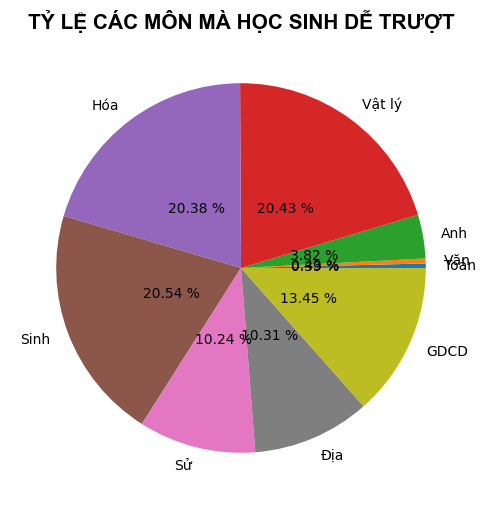

In [156]:
plt.figure(figsize = (20,6))

plt.pie(mon_hoc,             #Giá trị thể hiện
        labels=ten_mon_hoc,     #Nhãn tương ứng
        autopct='%.2f %%', #Tính toán và hiển thị Giá trị % tương ứng
        pctdistance=0.4)   #Khoảng cách hiển thị giá trị % tới tâm.

plt.title('TỶ LỆ CÁC MÔN MÀ HỌC SINH DỄ TRƯỢT', fontdict={'fontname':'Arial',
                                                    'fontweight':'bold',
                                                   'fontsize':15})
plt.show()

<center>
    <h1>
        Điểm trung bình các môn học
    </h1>
</center>

In [157]:
#trung bình điển môn toán
math_mean = all_data['Toán'].mean()
math_mean


6.370885868675293

In [158]:
#trung bình điển môn văn
literature_mean = all_data['Ngữ văn'].mean()
literature_mean


6.401899479728078

In [159]:
#trung bình điển môn anh
english_mean = all_data['Ngoại ngữ'].mean()
english_mean


4.38548964730205

In [160]:
#trung bình điển môn Sinh
biological_mean = all_data['Sinh học'].mean()
biological_mean


0.948226715596404

In [161]:
#trung bình điển môn hóa
chemistry_mean = all_data['Hóa học'].mean()
chemistry_mean


1.5335524656910857

In [162]:
#trung bình điển môn vật lý
physics_mean = all_data['Vật lý'].mean()
physics_mean


1.525782793756737

In [163]:
#trung bình điển môn Địa
geography_mean = all_data['Địa lý'].mean()
geography_mean


4.07074954718562

In [164]:
#trung bình điển môn lịch sử
history_mean = all_data['Lịch sử'].mean()
history_mean


3.8666985285918503

In [165]:
#trung bình điển môn GDCD
civic_education_mean = all_data['GDCD'].mean()
civic_education_mean


4.030461875691277